## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from scipy import stats

## Importing Dataset

In [4]:
main_df = pd.read_csv('raw_data/train.csv')
main_df = main_df.drop(main_df.columns[0], axis=1)

### Data Analysis

In [5]:
main_df.head()

,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642,Paid off with renewal
1,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,107027.25,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362,Paid in full
2,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485,Default
3,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035,Paid via discounted payoff
4,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299,Paid in full


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        1537 non-null   int64  
 1   owner_1_score                             1516 non-null   float64
 2   RATE_owner_1                              1510 non-null   object 
 3   CAP_AMOUNT_owner_1                        1506 non-null   float64
 4   PERCENT_OWN_owner_1                       1524 non-null   float64
 5   owner_2_score                             185 non-null    float64
 6   RATE_owner_2                              185 non-null    object 
 7   CAP_AMOUNT_owner_2                        174 non-null    float64
 8   PERCENT_OWN_owner_2                       224 non-null    float64
 9   owner_3_score                             7 non-null      float64
 10  RATE_owner_3                        

In [7]:
column_names = main_df.columns
print(column_names)

Index(['id', 'owner_1_score', 'RATE_owner_1', 'CAP_AMOUNT_owner_1',
       'PERCENT_OWN_owner_1', 'owner_2_score', 'RATE_owner_2',
       'CAP_AMOUNT_owner_2', 'PERCENT_OWN_owner_2', 'owner_3_score',
       'RATE_owner_3', 'CAP_AMOUNT_owner_3', 'PERCENT_OWN_owner_3',
       'years_in_business', 'RATE_ID_FOR_years_in_business', 'fsr',
       'RATE_ID_FOR_fsr', 'location', 'RATE_ID_FOR_location', 'funded_last_30',
       'RATE_ID_FOR_funded_last_30', 'judgement_lien_percent',
       'RATE_ID_FOR_judgement_lien_percent',
       'INPUT_VALUE_ID_FOR_judgement_lien_amount',
       'RATE_ID_FOR_judgement_lien_amount',
       'INPUT_VALUE_ID_FOR_judgement_lien_time',
       'RATE_ID_FOR_judgement_lien_time',
       'INPUT_VALUE_ID_FOR_num_negative_days', 'RATE_ID_FOR_num_negative_days',
       'INPUT_VALUE_ID_FOR_num_deposits', 'RATE_ID_FOR_num_deposits',
       'INPUT_VALUE_ID_FOR_monthly_gross', 'RATE_ID_FOR_monthly_gross',
       'INPUT_VALUE_ID_FOR_average_ledger', 'RATE_ID_FOR_average_led

In [8]:
main_df.describe()

,id,owner_1_score,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,owner_3_score,CAP_AMOUNT_owner_3,PERCENT_OWN_owner_3,...,INPUT_VALUE_ID_FOR_tax_lien_percent,INPUT_VALUE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
count,1537.000000,1516.000000,1506.000000,1524.000000,185.000000,174.000000,224.000000,7.000000,7.000000,33.000000,...,1537.000000,1528.000000,1525.000000,1.531000e+03,0.0,0.0,1510.000000,1457.000000,1491.000000,1537.000000
mean,4497.816526,639.666227,117031.872510,92.826509,1118.902703,117011.494253,35.324107,623.857143,85714.285714,7.572727,...,0.047681,0.014398,0.714754,9.107680e+04,NaN,NaN,656.448344,116420.727522,97.400469,3943.005205
std,2553.947155,436.564984,47147.062423,39.239430,1988.694684,53867.530571,18.474337,224.808384,80178.372574,16.709134,...,1.388539,0.176711,0.779881,1.732702e+05,NaN,NaN,570.443661,47681.543573,37.275931,2172.407533
min,33.000000,0.000000,0.000000,0.000000,432.000000,0.000000,0.000000,376.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,0.000000,88.000000
25%,2609.000000,573.000000,100000.000000,100.000000,582.000000,100000.000000,20.000000,387.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,568.000000,100000.000000,100.000000,2234.000000
50%,4468.000000,620.000000,150000.000000,100.000000,647.000000,150000.000000,49.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,4.735876e+04,NaN,NaN,621.000000,150000.000000,100.000000,4171.000000
75%,6324.000000,664.000000,150000.000000,100.000000,680.000000,150000.000000,50.000000,804.000000,150000.000000,0.000000,...,0.000000,0.000000,1.000000,1.051457e+05,NaN,NaN,665.000000,150000.000000,100.000000,5428.000000
max,11271.000000,9002.000000,150000.000000,1000.000000,9002.000000,150000.000000,64.000000,804.000000,150000.000000,50.000000,...,53.968000,3.000000,4.000000,2.291481e+06,NaN,NaN,9002.000000,150000.000000,1000.000000,9062.000000


In [9]:
for column in main_df.columns:
    nan_count = main_df[column].isna().sum()
    print(f"{column}: {nan_count}")

id: 0
owner_1_score: 21
RATE_owner_1: 27
CAP_AMOUNT_owner_1: 31
PERCENT_OWN_owner_1: 13
owner_2_score: 1352
RATE_owner_2: 1352
CAP_AMOUNT_owner_2: 1363
PERCENT_OWN_owner_2: 1313
owner_3_score: 1530
RATE_owner_3: 1530
CAP_AMOUNT_owner_3: 1530
PERCENT_OWN_owner_3: 1504
years_in_business: 12
RATE_ID_FOR_years_in_business: 12
fsr: 417
RATE_ID_FOR_fsr: 1522
location: 10
RATE_ID_FOR_location: 64
funded_last_30: 0
RATE_ID_FOR_funded_last_30: 1532
judgement_lien_percent: 0
RATE_ID_FOR_judgement_lien_percent: 0
INPUT_VALUE_ID_FOR_judgement_lien_amount: 0
RATE_ID_FOR_judgement_lien_amount: 0
INPUT_VALUE_ID_FOR_judgement_lien_time: 1537
RATE_ID_FOR_judgement_lien_time: 1537
INPUT_VALUE_ID_FOR_num_negative_days: 0
RATE_ID_FOR_num_negative_days: 2
INPUT_VALUE_ID_FOR_num_deposits: 0
RATE_ID_FOR_num_deposits: 0
INPUT_VALUE_ID_FOR_monthly_gross: 0
RATE_ID_FOR_monthly_gross: 0
INPUT_VALUE_ID_FOR_average_ledger: 0
RATE_ID_FOR_average_ledger: 0
INPUT_VALUE_ID_FOR_fc_margin: 0
RATE_ID_FOR_fc_margin: 0
INP

In [10]:
print('NA values:',main_df.isnull().values.any())

NA values: True


In [11]:
print(f"The shape of the Data Frame is: {main_df.shape}")

The shape of the Data Frame is: (1537, 55)


In [12]:
print(f"Number of Duplicates: {main_df.duplicated().sum()}")

Number of Duplicates: 421


In [13]:
unique_values = main_df['completion_status'].unique()

print(unique_values)

['Paid off with renewal' 'Paid in full' 'Default'
 'Paid via discounted payoff']


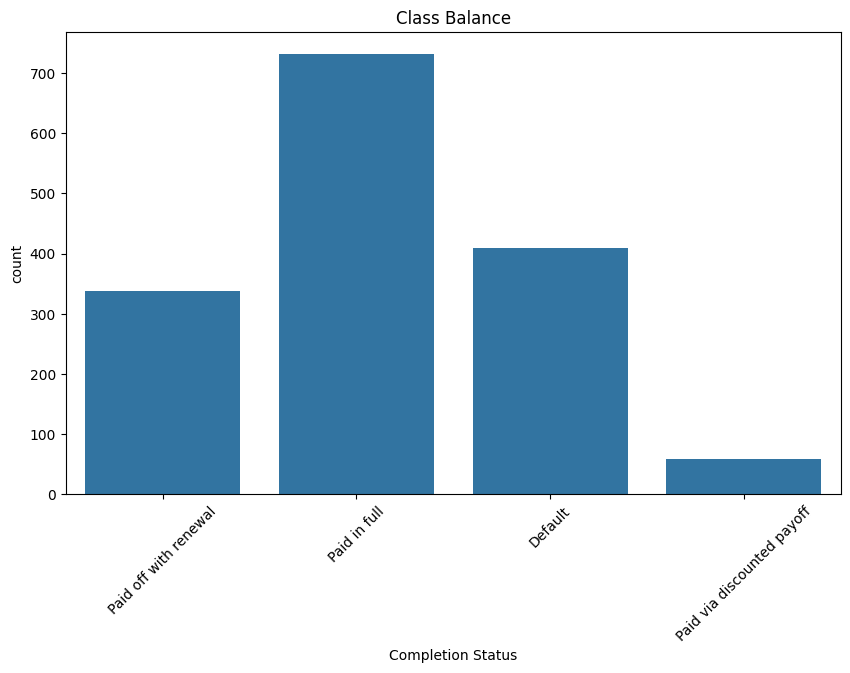

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=main_df['completion_status'])
plt.title('Class Balance')
plt.xlabel('Completion Status')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [15]:
main_df = main_df.drop_duplicates()

In [16]:
missing_threshold = 0.5

missing_percentages = main_df.isnull().mean()

columns_to_drop = missing_percentages[missing_percentages > missing_threshold].index

columns_to_drop = columns_to_drop.union(['id'])

print("Columns to drop:", columns_to_drop)

main_df = main_df.drop(columns_to_drop, axis=1)

Columns to drop: Index(['CAP_AMOUNT_owner_2', 'CAP_AMOUNT_owner_3',
       'INPUT_VALUE_ID_FOR_judgement_lien_time', 'PERCENT_OWN_owner_2',
       'PERCENT_OWN_owner_3', 'RATE_ID_FOR_avg_net_deposits',
       'RATE_ID_FOR_fsr', 'RATE_ID_FOR_funded_last_30',
       'RATE_ID_FOR_industry_type', 'RATE_ID_FOR_judgement_lien_time',
       'RATE_owner_2', 'RATE_owner_3', 'id', 'owner_2_score', 'owner_3_score'],
      dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = []

for column in main_df.columns:
    if main_df[column].dtype == object:
        label_encoder.fit(main_df[column])
        main_df[column] = label_encoder.transform(main_df[column])
        categorical_columns.append(column)

main_df.info()

print("Categorical columns:", categorical_columns)

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1535
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   owner_1_score                             1098 non-null   float64
 1   RATE_owner_1                              1116 non-null   int32  
 2   CAP_AMOUNT_owner_1                        1090 non-null   float64
 3   PERCENT_OWN_owner_1                       1103 non-null   float64
 4   years_in_business                         1104 non-null   float64
 5   RATE_ID_FOR_years_in_business             1116 non-null   int32  
 6   fsr                                       806 non-null    float64
 7   location                                  1116 non-null   int32  
 8   RATE_ID_FOR_location                      1116 non-null   int32  
 9   funded_last_30                            1116 non-null   int32  
 10  judgement_lien_percent                   

In [18]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit(main_df)
    
imputed_data = imputer.transform(main_df)
imputed_main_df = pd.DataFrame(imputed_data, columns=main_df.columns)
imputed_main_df = imputed_main_df.astype(main_df.dtypes.to_dict())
main_df=imputed_main_df


In [19]:
main_df.isna().sum()

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
RATE_ID_FOR_location                        0
funded_last_30                              0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger        

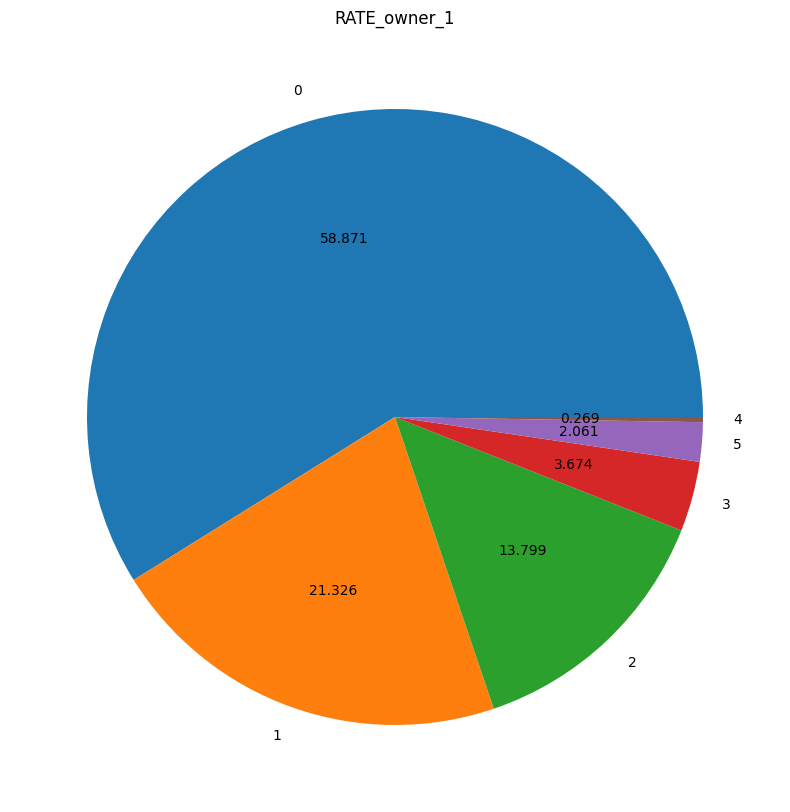

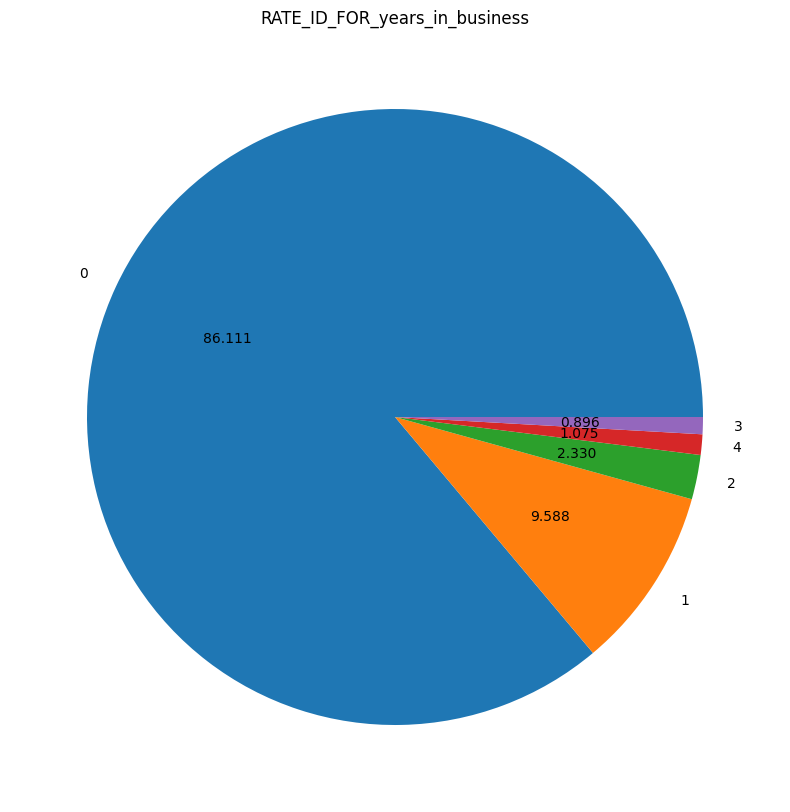

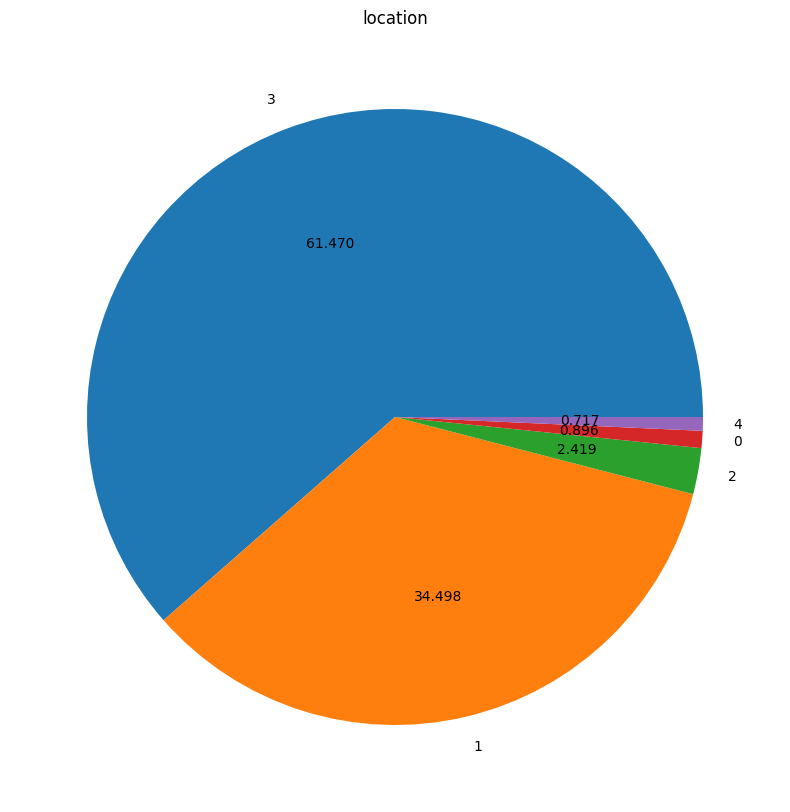

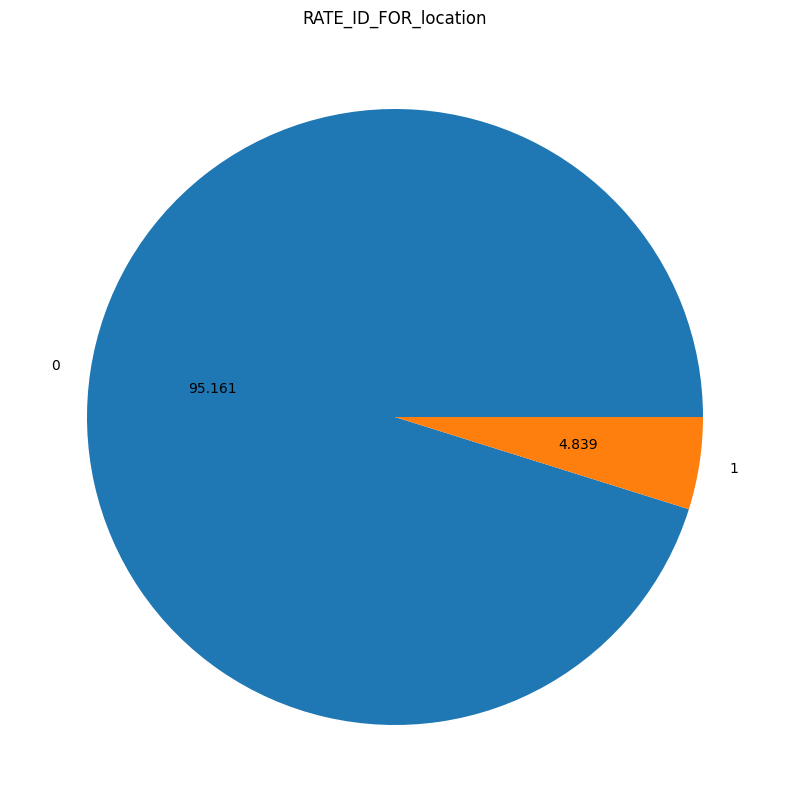

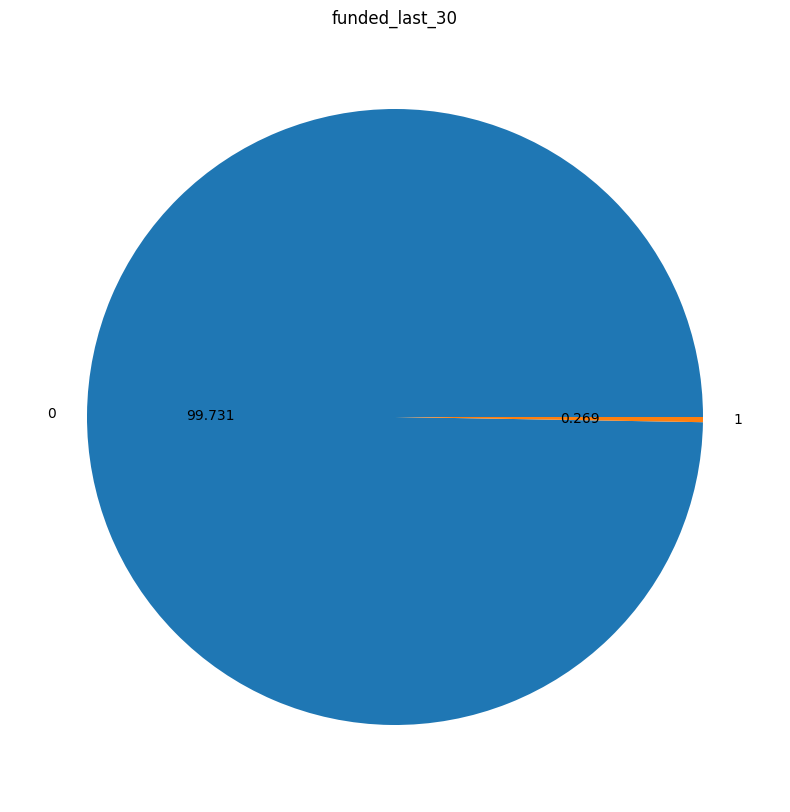

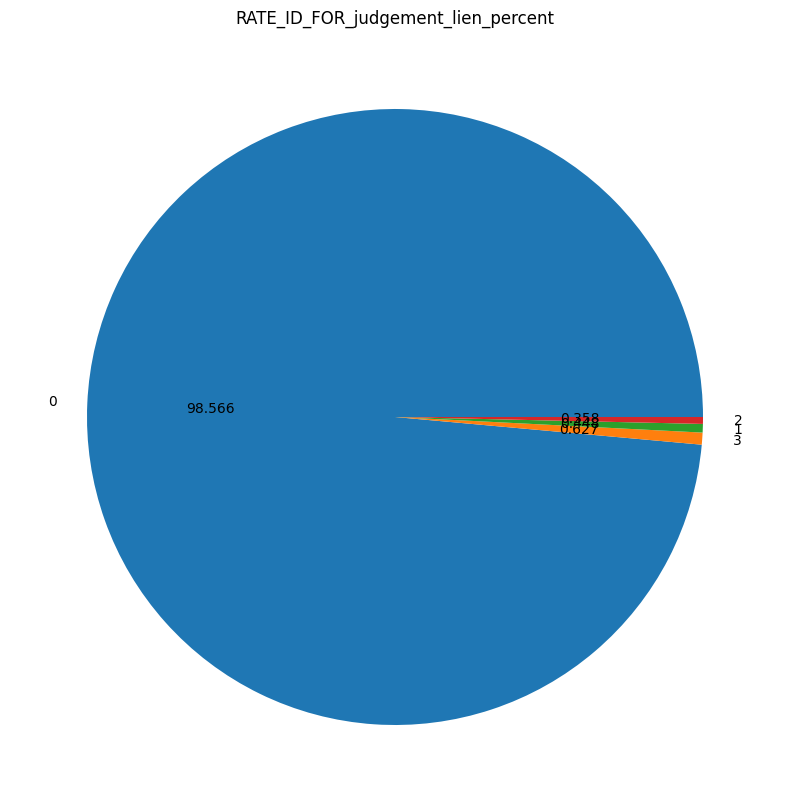

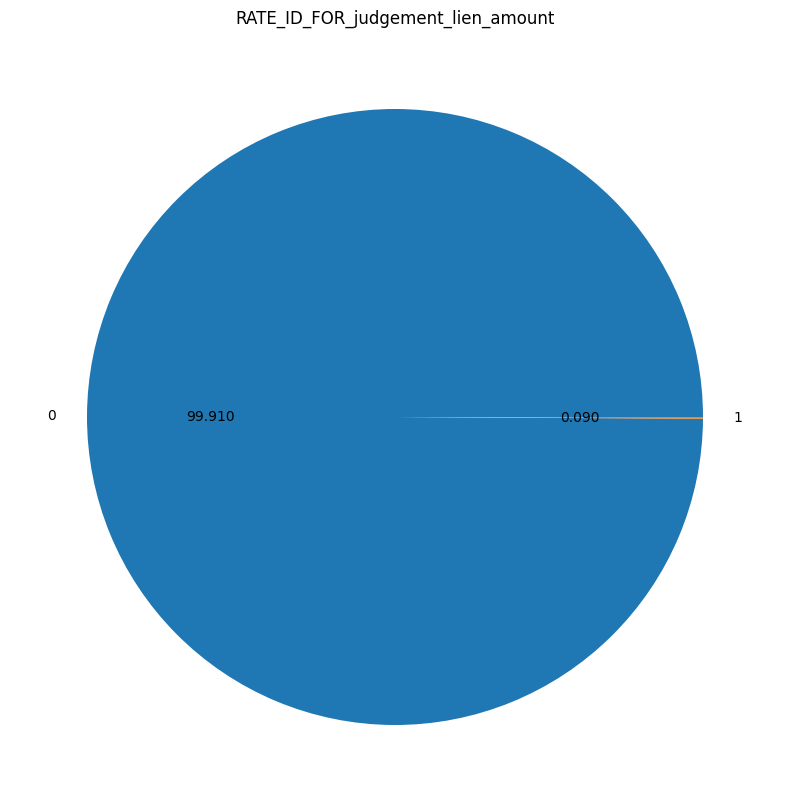

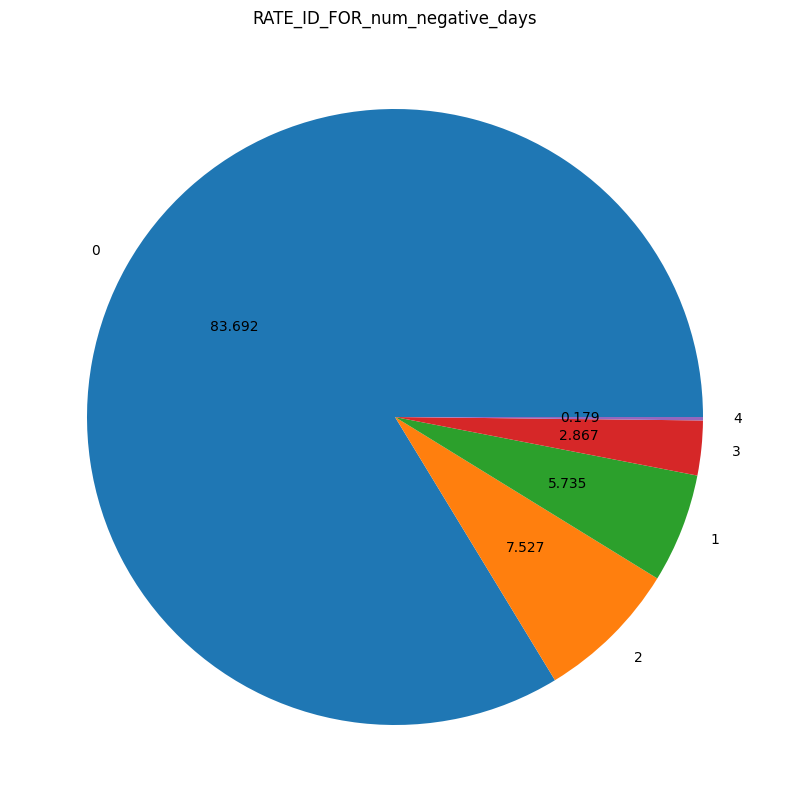

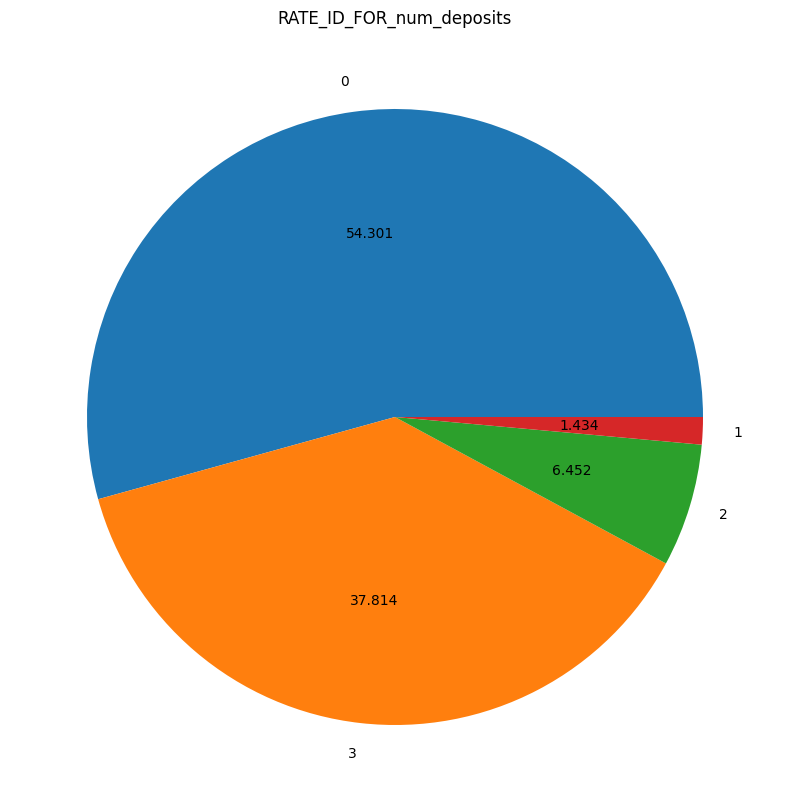

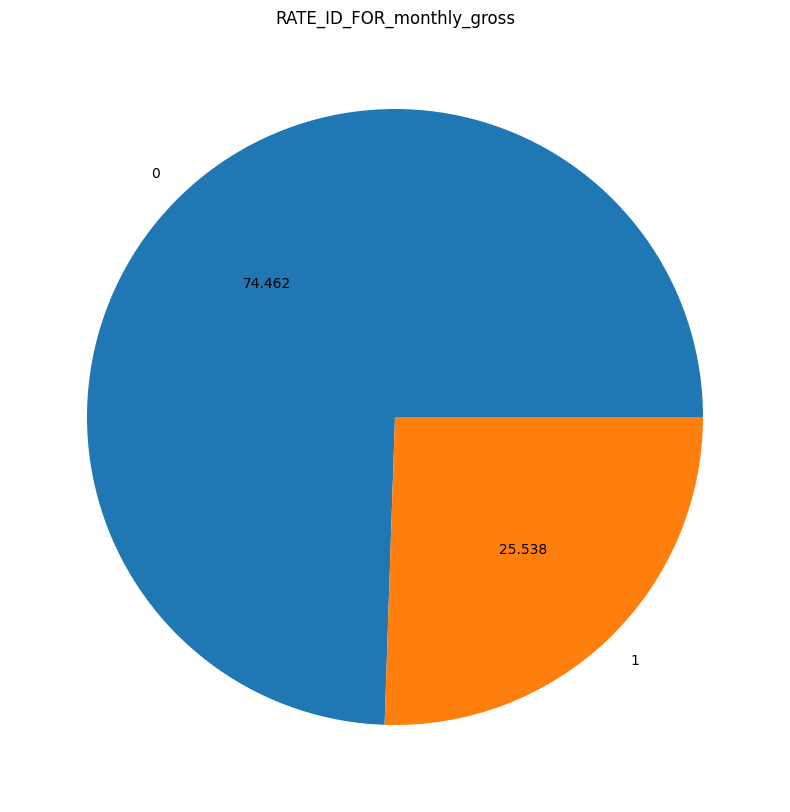

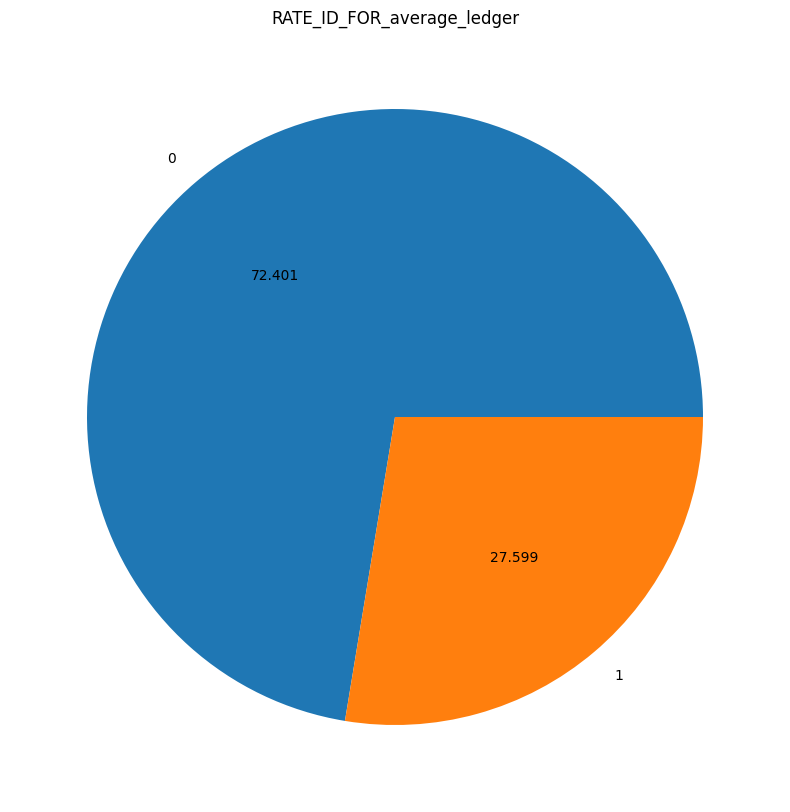

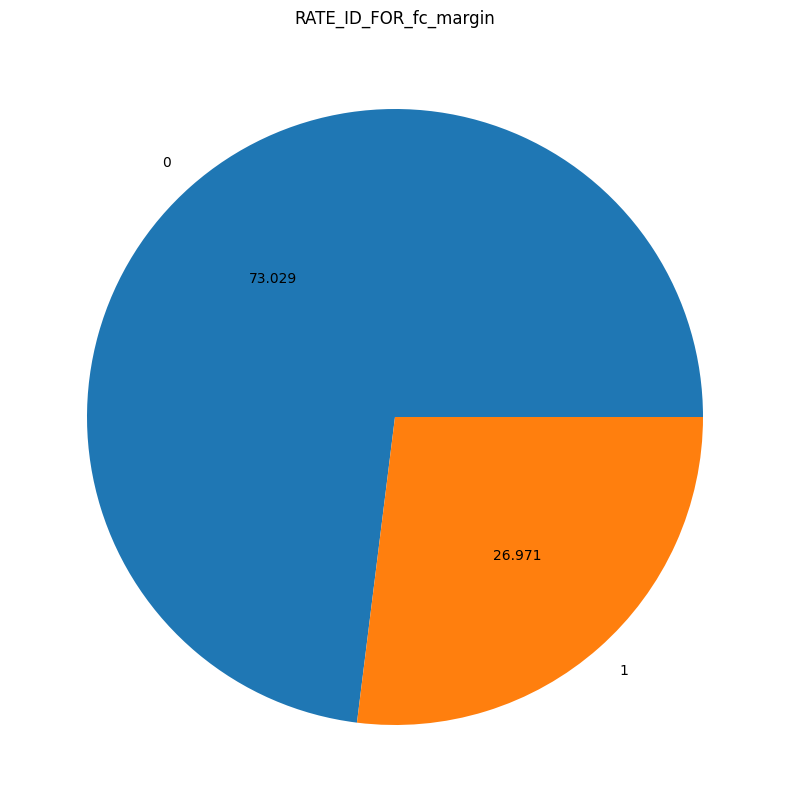

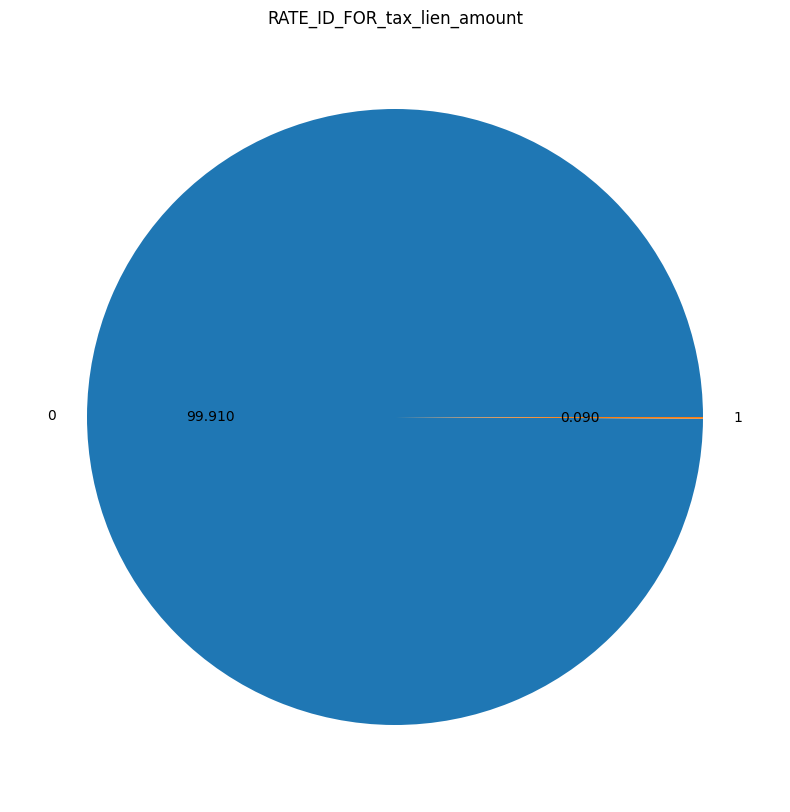

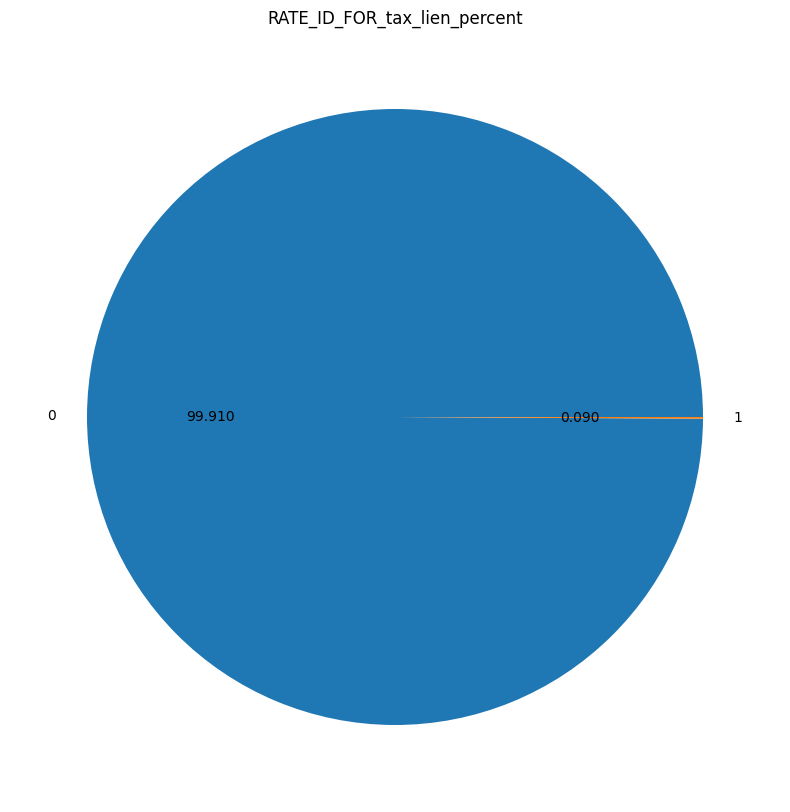

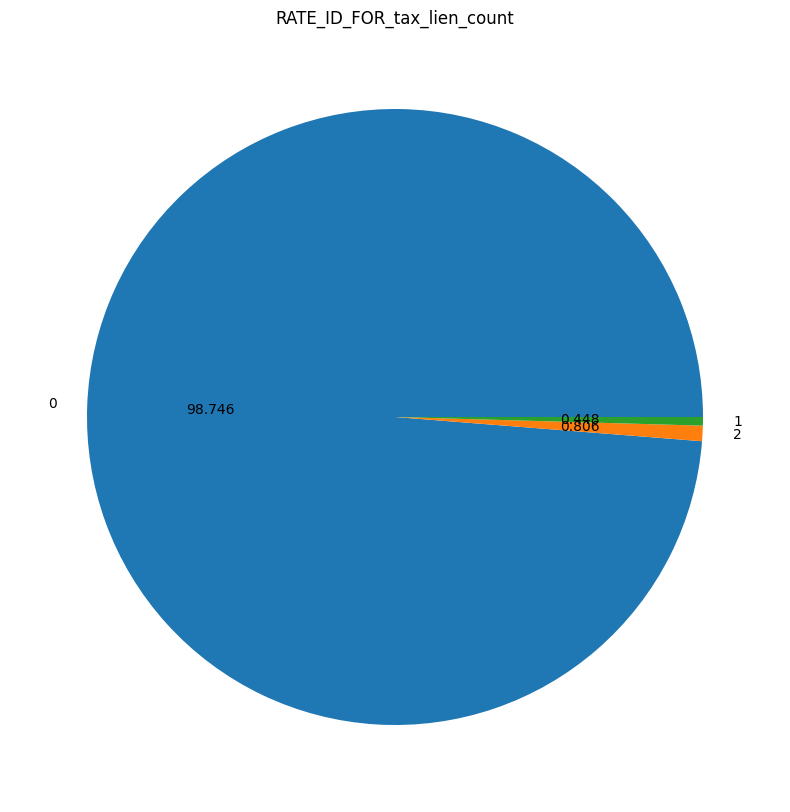

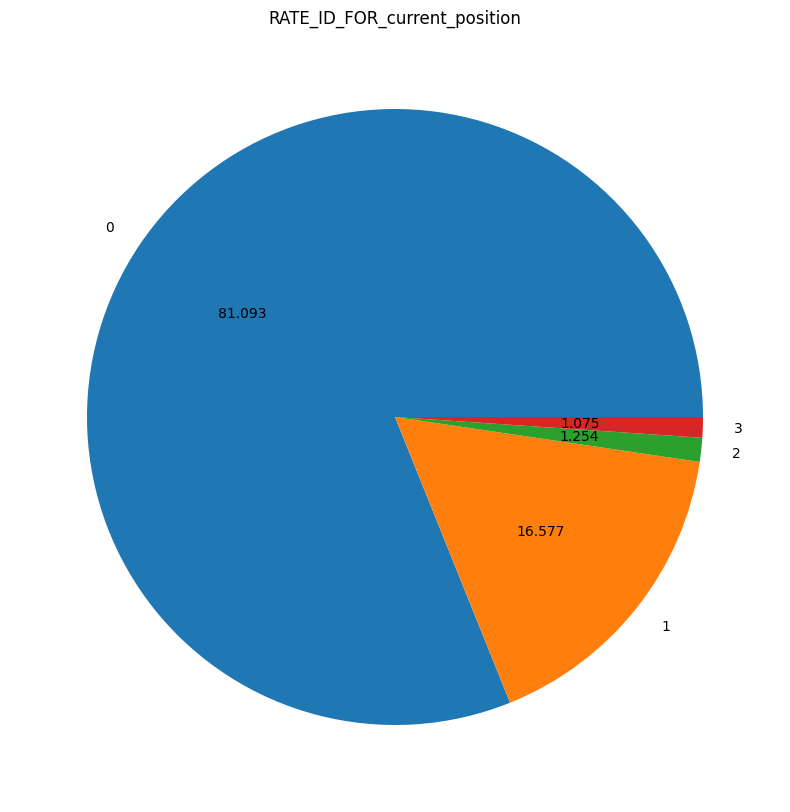

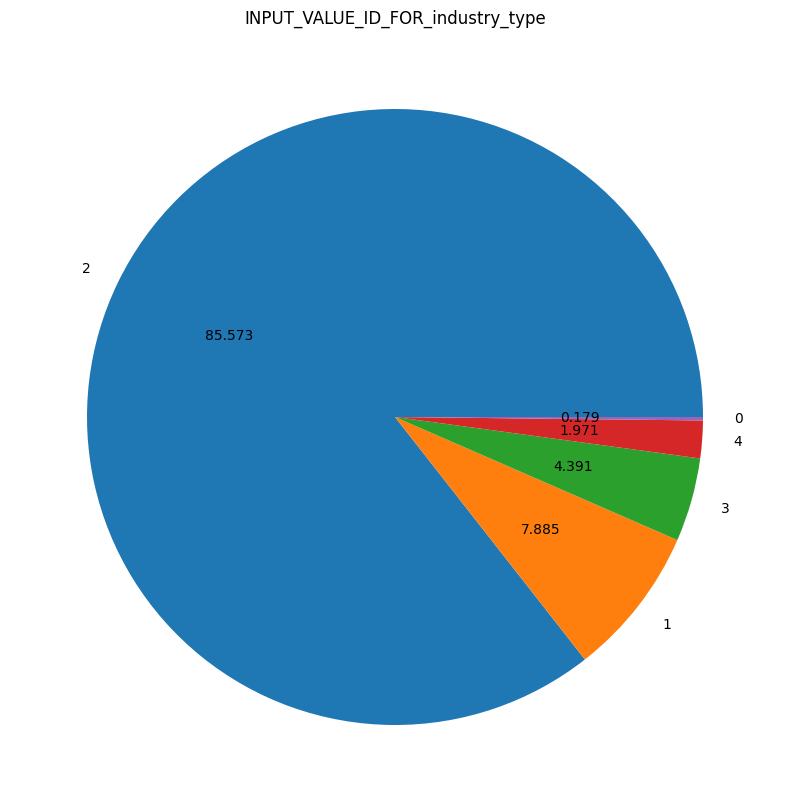

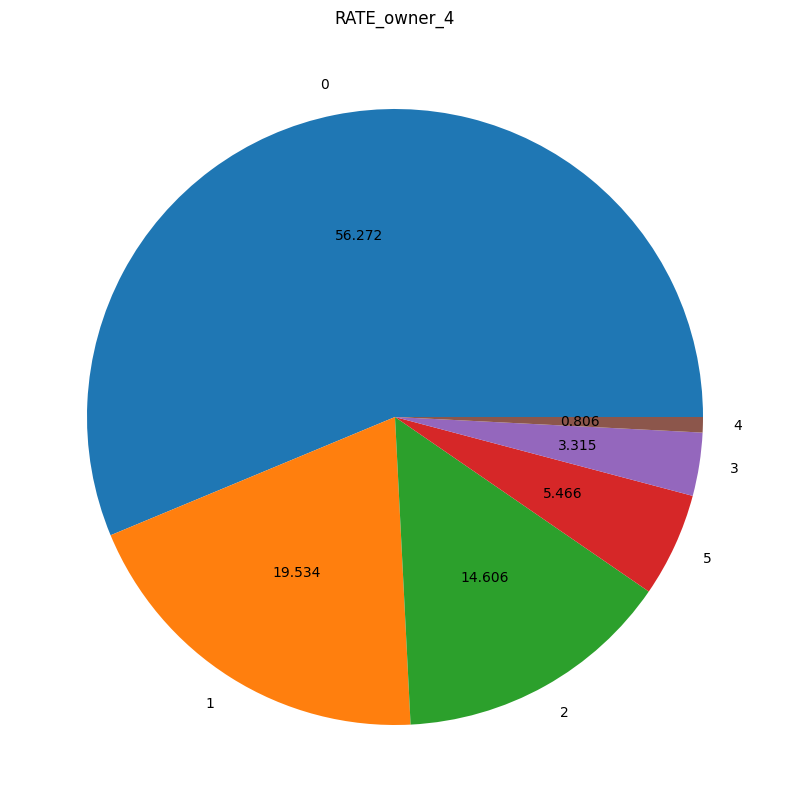

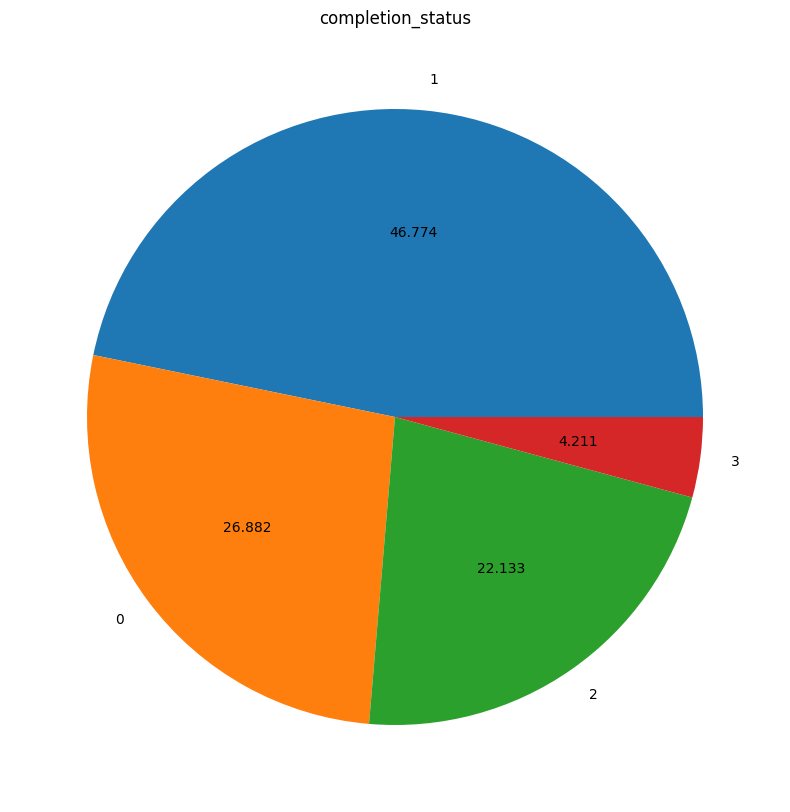

In [20]:
import matplotlib.pyplot as plt

for col in categorical_columns:
    plt.figure(figsize=(40, 10))
    plt.title(col)
    value_counts = main_df[col].value_counts()
    plt.pie(value_counts,
           labels=value_counts.index,
           shadow=False,
           autopct='%.3f')
    plt.show()


In [21]:
#Overly biased features
main_df.drop('RATE_ID_FOR_location', axis = 1,inplace =True)
main_df.drop('funded_last_30', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_judgement_lien_percent', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_judgement_lien_amount', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_tax_lien_amount', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_tax_lien_percent', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_tax_lien_count', axis = 1,inplace =True)

In [22]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   owner_1_score                             1116 non-null   float64
 1   RATE_owner_1                              1116 non-null   int32  
 2   CAP_AMOUNT_owner_1                        1116 non-null   float64
 3   PERCENT_OWN_owner_1                       1116 non-null   float64
 4   years_in_business                         1116 non-null   float64
 5   RATE_ID_FOR_years_in_business             1116 non-null   int32  
 6   fsr                                       1116 non-null   float64
 7   location                                  1116 non-null   int32  
 8   judgement_lien_percent                    1116 non-null   float64
 9   INPUT_VALUE_ID_FOR_judgement_lien_amount  1116 non-null   float64
 10  INPUT_VALUE_ID_FOR_num_negative_days

In [23]:
main_df.isnull().sum()

owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
judgement_lien_percent                      0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
INPUT_VALUE_ID_FOR_num_negative_days        0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger                  0
INPUT_VALUE_ID_FOR_fc_margin                0
RATE_ID_FOR_fc_margin                       0
INPUT_VALUE_ID_FOR_tax_lien_amount          0
INPUT_VALUE_ID_FOR_tax_lien_percen

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] =main_df.columns
main_df.astype(np.float64)
vif['VIF'] = [variance_inflation_factor(main_df.values, i) for i in range(main_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#Remove High VIF to reduce redudancy

,Features,VIF
20,INPUT_VALUE_ID_FOR_tax_lien_amount,12038.53
9,INPUT_VALUE_ID_FOR_judgement_lien_amount,11320.89
21,INPUT_VALUE_ID_FOR_tax_lien_percent,8416.32
8,judgement_lien_percent,7704.24
25,INPUT_VALUE_ID_FOR_avg_net_deposits,509.43
14,INPUT_VALUE_ID_FOR_monthly_gross,503.91
2,CAP_AMOUNT_owner_1,248.90
29,CAP_AMOUNT_owner_4,244.19
30,PERCENT_OWN_owner_4,32.60
3,PERCENT_OWN_owner_1,28.33


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
selected_columns = main_df[['INPUT_VALUE_ID_FOR_tax_lien_amount',
                       'INPUT_VALUE_ID_FOR_judgement_lien_amount', 
                       'INPUT_VALUE_ID_FOR_tax_lien_percent',
                       'judgement_lien_percent', 
                       'INPUT_VALUE_ID_FOR_avg_net_deposits',
                       'INPUT_VALUE_ID_FOR_monthly_gross',
                       'CAP_AMOUNT_owner_1',
                       'CAP_AMOUNT_owner_4',
                       'PERCENT_OWN_owner_4',
                       'PERCENT_OWN_owner_1',
                       'INPUT_VALUE_ID_FOR_industry_type',
                       'RATE_ID_FOR_fc_margin',
                       'RATE_ID_FOR_monthly_gross',
                       'owner_1_score']]
scaler = StandardScaler()
std = scaler.fit_transform(selected_columns)
pca = PCA(n_components=1)
pca.fit(std)
X_pca = pca.transform(std)

In [26]:
#Remove High VIF to reduce redudancy
main_df.drop('INPUT_VALUE_ID_FOR_tax_lien_amount', axis = 1,inplace =True)
main_df.drop('INPUT_VALUE_ID_FOR_judgement_lien_amount', axis = 1,inplace =True)
main_df.drop('INPUT_VALUE_ID_FOR_tax_lien_percent', axis = 1,inplace =True)
main_df.drop('judgement_lien_percent', axis = 1,inplace =True)

main_df['PCA']=X_pca
main_df['PCA'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1116 entries, 0 to 1115
Series name: PCA
Non-Null Count  Dtype  
--------------  -----  
1116 non-null   float64
dtypes: float64(1)
memory usage: 8.8 KB


In [27]:
from sklearn.feature_selection import chi2

categorical=main_df[['RATE_owner_1', 
            'RATE_ID_FOR_years_in_business', 
            'location',
            'RATE_ID_FOR_num_negative_days',
            'RATE_ID_FOR_num_deposits',
            'RATE_ID_FOR_monthly_gross',
            'RATE_ID_FOR_average_ledger',
            'RATE_ID_FOR_fc_margin',
            'RATE_ID_FOR_current_position',
            'INPUT_VALUE_ID_FOR_industry_type',
            'RATE_owner_4',
            'completion_status']]

In [28]:
x_temp=categorical.drop("completion_status",axis=1)
y_temp=categorical['completion_status']

In [29]:
chi_scores=chi2(x_temp,y_temp)

In [30]:
chi_scores

(array([14.51258528, 21.32957966,  0.83458343, 59.29400406,  6.95335266,
         2.13771197,  1.61216275,  2.53507818,  0.43887518,  0.82228131,
        20.92325125]),
 array([2.28431177e-03, 8.99213346e-05, 8.41178493e-01, 8.31885586e-13,
        7.33995378e-02, 5.44321131e-01, 6.56635153e-01, 4.68985013e-01,
        9.32099733e-01, 8.44130549e-01, 1.09211308e-04]))

<Axes: >

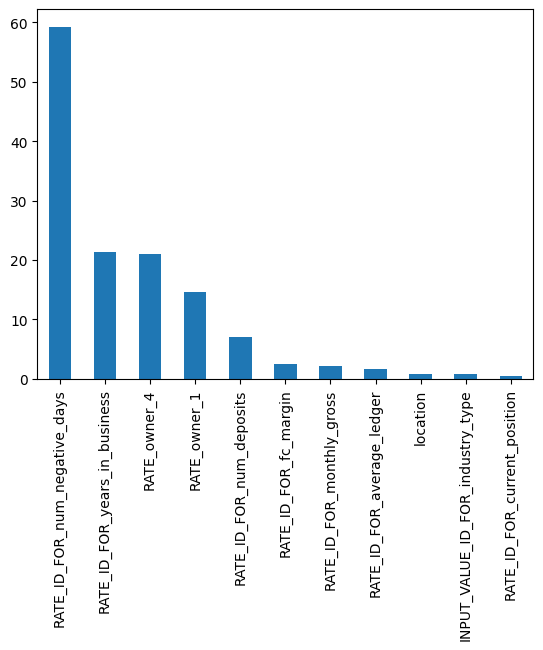

In [31]:
#the higher the chi value the more important the feature
chi_values=pd.Series(chi_scores[0],index=x_temp.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

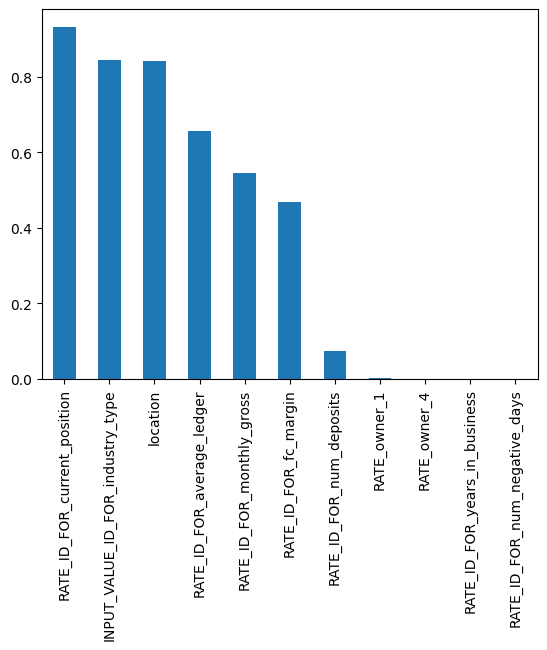

In [32]:
#the lower the p value the more important the feature
p_values=pd.Series(chi_scores[1],index=x_temp.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [33]:
main_df.drop('RATE_ID_FOR_average_ledger', axis = 1,inplace =True)
main_df.drop('INPUT_VALUE_ID_FOR_industry_type', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_current_position', axis = 1,inplace =True)
main_df.drop('location', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_monthly_gross', axis = 1,inplace =True)
main_df.drop('RATE_ID_FOR_fc_margin', axis = 1,inplace =True)

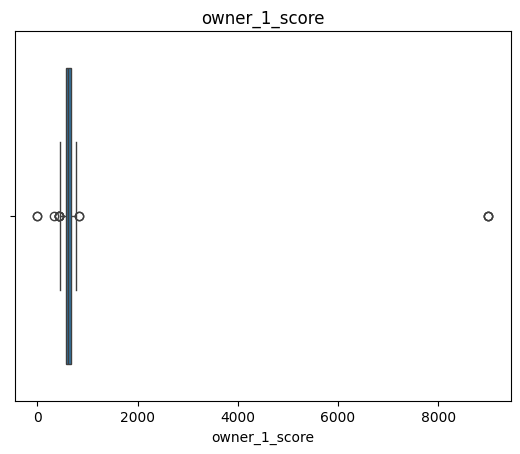

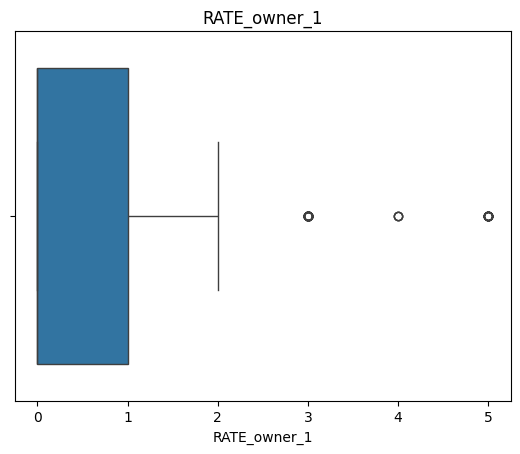

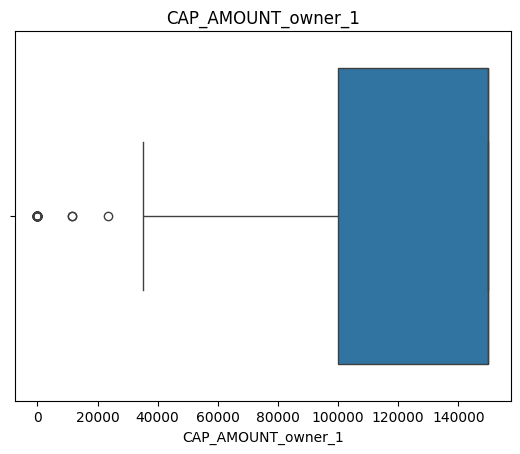

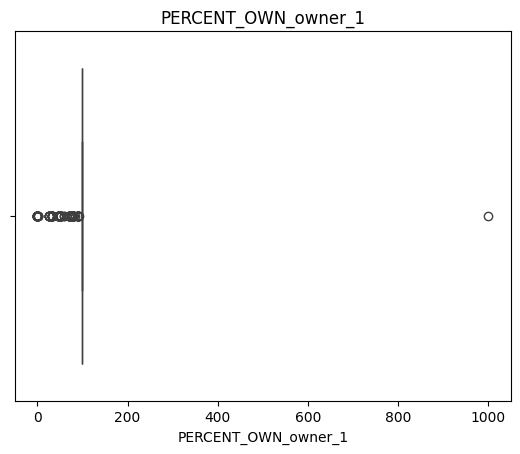

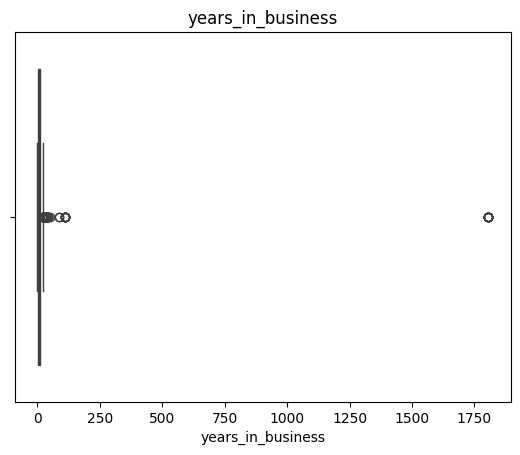

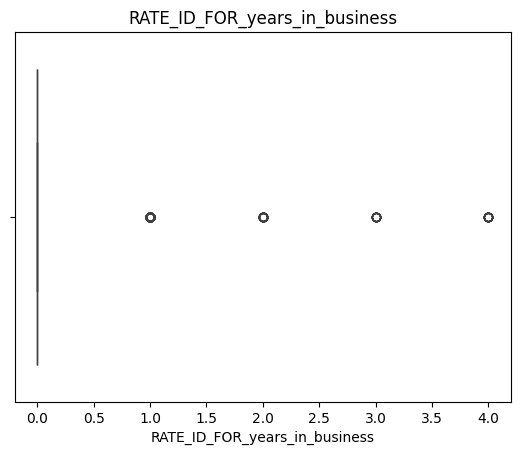

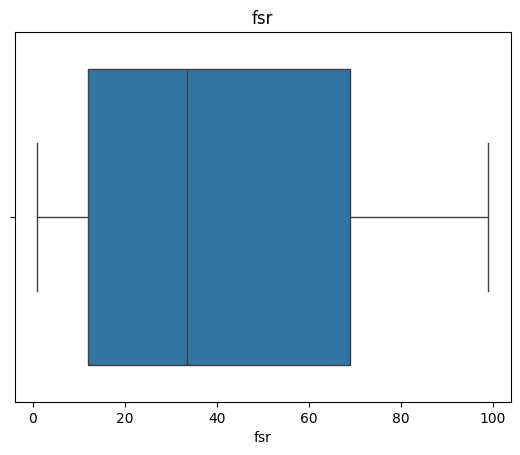

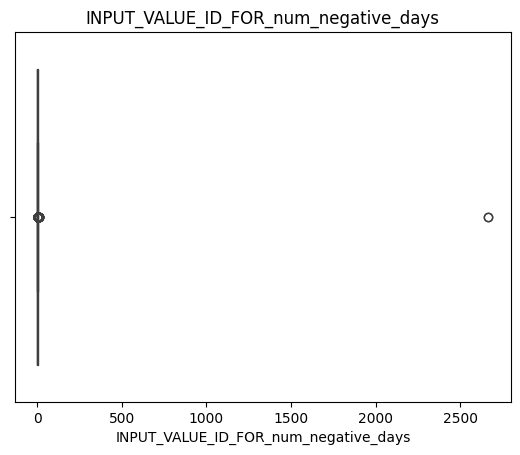

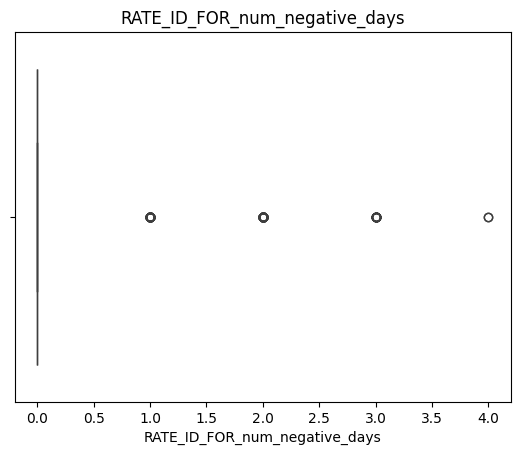

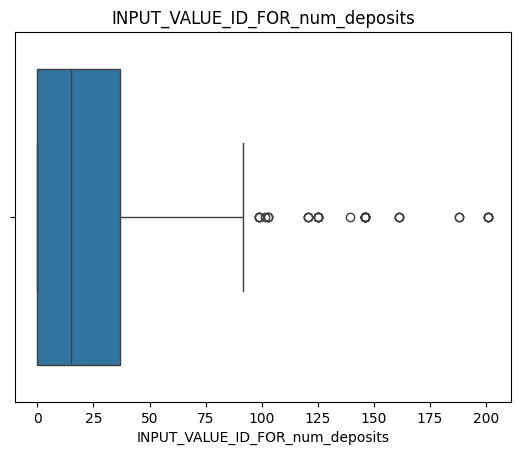

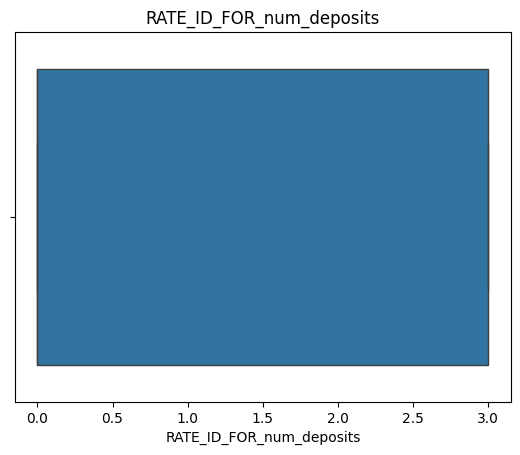

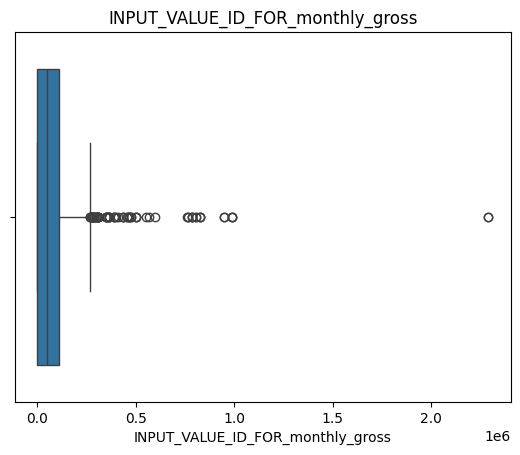

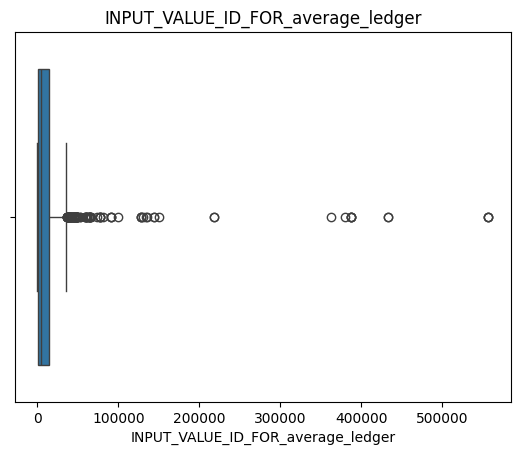

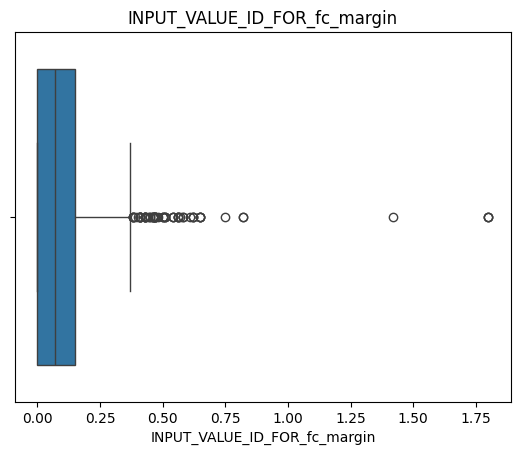

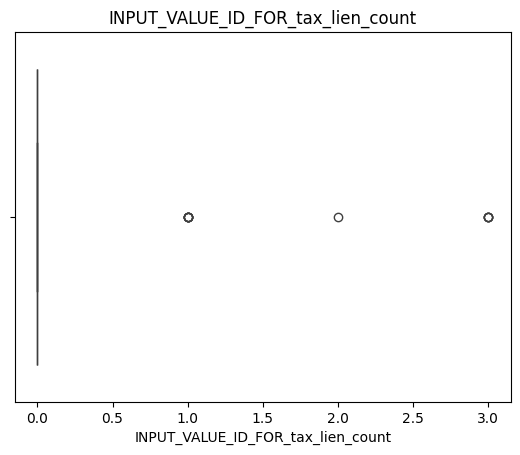

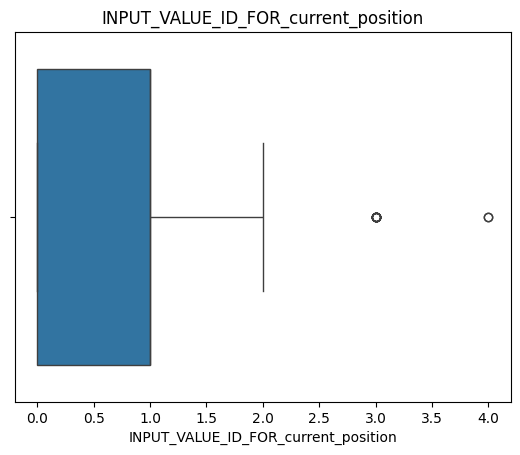

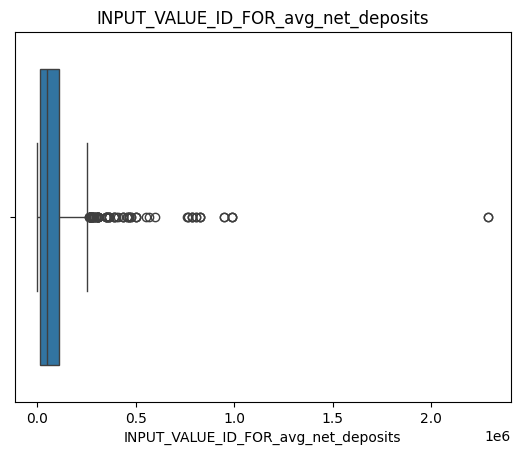

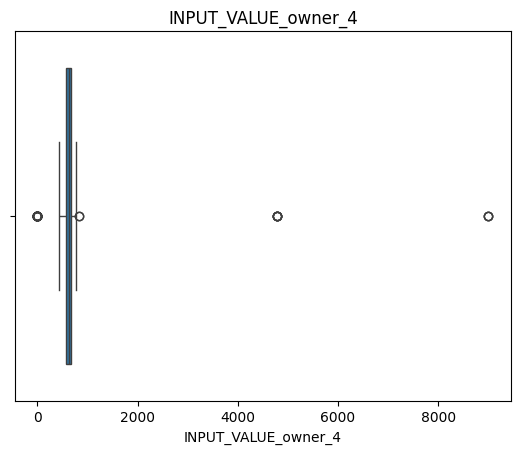

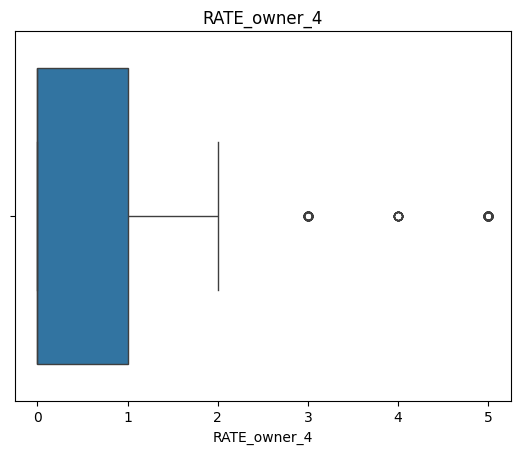

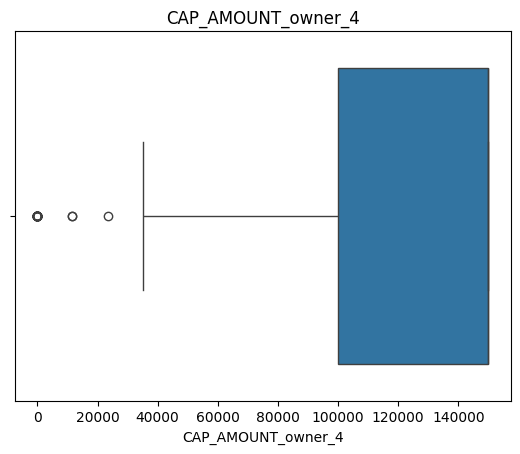

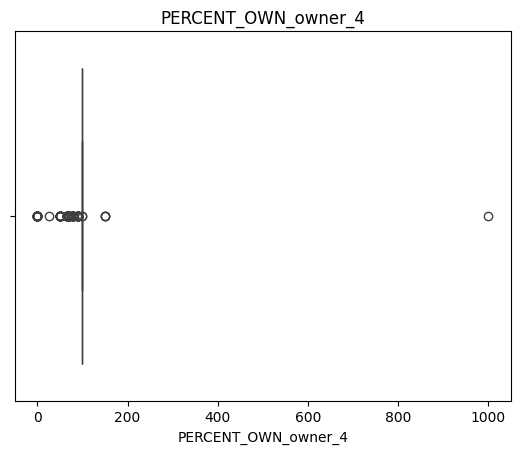

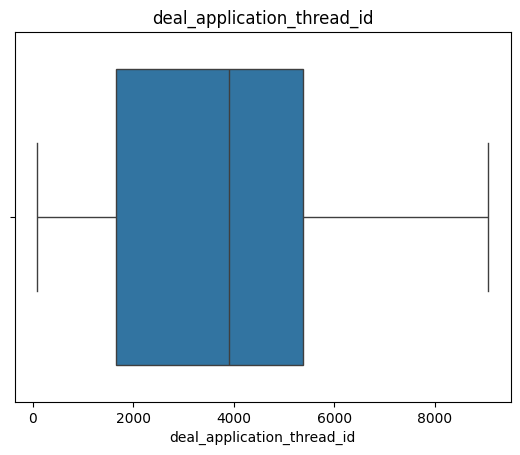

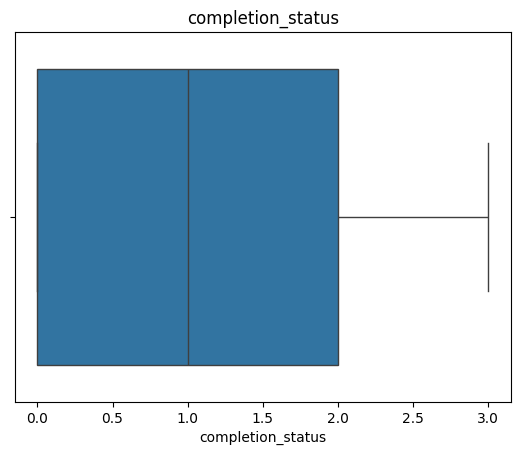

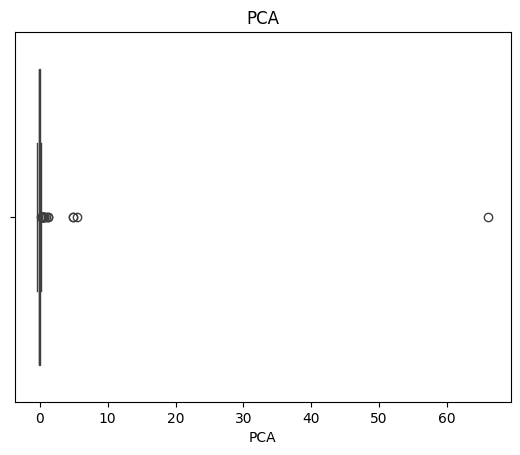

In [34]:
for i in main_df.columns:
    plt.figure()
    sns.boxplot(x=main_df[i])
    plt.title(i)
    plt.show()


In [35]:
# The feature was all "0s"
main_df.drop(['INPUT_VALUE_ID_FOR_tax_lien_count'], axis='columns', inplace=True)

In [36]:
cols = ['years_in_business', 'PERCENT_OWN_owner_1',
        'INPUT_VALUE_ID_FOR_num_negative_days',
        'INPUT_VALUE_ID_FOR_num_deposits',
        'INPUT_VALUE_ID_FOR_monthly_gross',
        'INPUT_VALUE_ID_FOR_average_ledger',
        'INPUT_VALUE_ID_FOR_fc_margin',
        'INPUT_VALUE_ID_FOR_current_position',
        'INPUT_VALUE_ID_FOR_avg_net_deposits',
        'INPUT_VALUE_owner_4'
        ]

z_scores = stats.zscore(main_df[cols])
print(np.isnan(z_scores).sum())

df_clean = main_df[(np.abs(z_scores) < 3).all(axis=1)]

print(df_clean.isna().sum())

df_clean = main_df[(z_scores < 3).all(axis=1)]
# df_clean.info()

years_in_business                       0
PERCENT_OWN_owner_1                     0
INPUT_VALUE_ID_FOR_num_negative_days    0
INPUT_VALUE_ID_FOR_num_deposits         0
INPUT_VALUE_ID_FOR_monthly_gross        0
INPUT_VALUE_ID_FOR_average_ledger       0
INPUT_VALUE_ID_FOR_fc_margin            0
INPUT_VALUE_ID_FOR_current_position     0
INPUT_VALUE_ID_FOR_avg_net_deposits     0
INPUT_VALUE_owner_4                     0
dtype: int64
owner_1_score                           0
RATE_owner_1                            0
CAP_AMOUNT_owner_1                      0
PERCENT_OWN_owner_1                     0
years_in_business                       0
RATE_ID_FOR_years_in_business           0
fsr                                     0
INPUT_VALUE_ID_FOR_num_negative_days    0
RATE_ID_FOR_num_negative_days           0
INPUT_VALUE_ID_FOR_num_deposits         0
RATE_ID_FOR_num_deposits                0
INPUT_VALUE_ID_FOR_monthly_gross        0
INPUT_VALUE_ID_FOR_average_ledger       0
INPUT_VALUE_ID_FOR_fc

In [37]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   owner_1_score                         1116 non-null   float64
 1   RATE_owner_1                          1116 non-null   int32  
 2   CAP_AMOUNT_owner_1                    1116 non-null   float64
 3   PERCENT_OWN_owner_1                   1116 non-null   float64
 4   years_in_business                     1116 non-null   float64
 5   RATE_ID_FOR_years_in_business         1116 non-null   int32  
 6   fsr                                   1116 non-null   float64
 7   INPUT_VALUE_ID_FOR_num_negative_days  1116 non-null   float64
 8   RATE_ID_FOR_num_negative_days         1116 non-null   int32  
 9   INPUT_VALUE_ID_FOR_num_deposits       1116 non-null   float64
 10  RATE_ID_FOR_num_deposits              1116 non-null   int32  
 11  INPUT_VALUE_ID_FO

In [38]:
main_df['years_in_business']=df_clean['years_in_business']
main_df['PERCENT_OWN_owner_1']=df_clean['PERCENT_OWN_owner_1']
main_df['INPUT_VALUE_ID_FOR_num_negative_days']=df_clean['INPUT_VALUE_ID_FOR_num_negative_days']
main_df['INPUT_VALUE_ID_FOR_num_deposits']=df_clean['INPUT_VALUE_ID_FOR_num_deposits']
main_df['INPUT_VALUE_ID_FOR_monthly_gross']=df_clean['INPUT_VALUE_ID_FOR_monthly_gross']
main_df['INPUT_VALUE_ID_FOR_average_ledger']=df_clean['INPUT_VALUE_ID_FOR_average_ledger']
main_df['INPUT_VALUE_ID_FOR_fc_margin']=df_clean['INPUT_VALUE_ID_FOR_fc_margin']
main_df['INPUT_VALUE_ID_FOR_current_position']=df_clean['INPUT_VALUE_ID_FOR_current_position']
main_df['INPUT_VALUE_ID_FOR_avg_net_deposits']=df_clean['INPUT_VALUE_ID_FOR_avg_net_deposits']
main_df['INPUT_VALUE_owner_4']=df_clean['INPUT_VALUE_owner_4']

In [39]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit(main_df)
imputed_data = imputer.transform(main_df)

imputed_df = pd.DataFrame(imputed_data, columns=main_df.columns)
imputed_df = imputed_df.astype(main_df.dtypes.to_dict())
df=imputed_df

### Splitting the dataset into the Training set and Test set

In [40]:
X = df.drop(['completion_status'],axis=1)
y = df['completion_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Min Max Scaling the data

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:

param_grid = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 500, 1000, 3000]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 200, 500, 1000, 3000]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.7], 'max_iter': [100, 200, 500, 1000, 3000]},
    {'penalty': [None], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [100, 200, 500, 1000, 3000]}
]

classifier = LogisticRegression(random_state=83)

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

In [73]:
y_pred_best = best_estimator.predict(X_test)

from sklearn.metrics import mean_squared_error, accuracy_score

mse_best = mean_squared_error(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Mean Squared Error (MSE) with best estimator:", mse_best)
print("Accuracy with best estimator:", accuracy_best)

Mean Squared Error (MSE) with best estimator: 0.7134328358208956
Accuracy with best estimator: 0.5253731343283582


## Support Vector Machine 

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# svc_model = SVC(C=150, kernel='poly', degree= 4, gamma = 'scale')
# svc_model.fit(X_train, y_train)
# print(svc_model.score(X_train, y_train))
# print(svc_model.score(X_test, y_test))
# y_pred = svc_model.predict(X_test)

# report = classification_report(y_test, y_pred)

# print(report)

In [94]:
param_grid = {'kernel': ('linear', 'rbf','poly') , 
              'C':[5, 10, 100],
              'gamma': [1,0.1,0.01,0.001], 
              'degree' : [1,2,3,4,5,6]}

svc_model = SVC()

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}


In [95]:
train_score = best_estimator.score(X_train, y_train)
test_score = best_estimator.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

y_pred = best_estimator.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

Training Score: 0.93854033290653
Test Score: 0.7194029850746269
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        79
           1       0.76      0.81      0.78       171
           2       0.67      0.64      0.65        74
           3       1.00      0.55      0.71        11

    accuracy                           0.72       335
   macro avg       0.77      0.66      0.70       335
weighted avg       0.72      0.72      0.72       335



## Decision Tree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f"Best Parameters: {best_params_grid}")
print(f"Best Cross-Validation Score: {best_score_grid}")

best_estimator_grid = grid_search.best_estimator_

train_score = best_estimator_grid.score(X_train, y_train)
test_score = best_estimator_grid.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

y_pred = best_estimator_grid.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7131634819532909
Training Score: 0.9897567221510883
Test Score: 0.7791044776119403
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        79
           1       0.83      0.80      0.82       171
           2       0.74      0.78      0.76        74
           3       0.88      0.64      0.74        11

    accuracy                           0.78       335
   macro avg       0.79      0.74      0.76       335
weighted avg       0.78      0.78      0.78       335



## Neural Network Classifier (MLP)

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

mlp_model = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp_model, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print(f"Best Parameters: {best_params_grid}")
print(f"Best Cross-Validation Score: {best_score_grid}")

best_estimator_grid = grid_search.best_estimator_

train_score = best_estimator_grid.score(X_train, y_train)
test_score = best_estimator_grid.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

y_pred = best_estimator_grid.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

KeyboardInterrupt: 

## K Neighbors Classifier (KNN)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
print(knn_model.score(X_train, y_train))
print(knn_model.score(X_test, y_test))
y_pred = knn_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

1.0
0.7104477611940299
              precision    recall  f1-score   support

           0       0.61      0.72      0.66        79
           1       0.79      0.75      0.77       171
           2       0.69      0.64      0.66        74
           3       0.50      0.55      0.52        11

    accuracy                           0.71       335
   macro avg       0.65      0.66      0.65       335
weighted avg       0.72      0.71      0.71       335



## XGB Classifier (XGBoost)

In [49]:
from xgboost import XGBClassifier
XGB = XGBClassifier(max_depth=4, subsample=1, n_estimators=200, min_child_weight=3, random_state=100,learning_rate= 0.5)
XGB.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(XGB.score(X_test,y_test)*100))

Model accuracy score: 100.0000
Model accuracy score: 88.0597


## LGB Classifier (LightGBM)

In [50]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=200, num_leaves=31,max_depth= 9, learning_rate= 0.4)
clf.fit(X_train, y_train)
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_train,y_train)*100))
print('Model accuracy score: {0:0.4f}'. format(clf.score(X_test,y_test)*100))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 781, number of used features: 22
[LightGBM] [Info] Start training from score -1.262412
[LightGBM] [Info] Start training from score -0.799789
[LightGBM] [Info] Start training from score -1.507284
[LightGBM] [Info] Start training from score -3.077056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No